# **Environment Building**

In [ ]:
!pip install kagglehub

In [ ]:
 # Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# **1. Importing Dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")

print("Path to dataset files:", path)

100%|██████████| 66.2k/66.2k [00:00<00:00, 45.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/students-performance-dataset/versions/2


In [ ]:
 # Changing the path of Dataset
import shutil

# Source path
src_path = "/root/.cache/kagglehub/datasets/rabieelkharoua/students-performance-dataset/versions/2"

# Destination path in /content
dst_path = "/content/students-performance-dataset"

# Copy the entire folder to /content
shutil.copytree(src_path, dst_path, dirs_exist_ok=True)

print("Dataset copied to:", dst_path)


Dataset copied to: /content/students-performance-dataset


# **2. Loading Dataset**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/students-performance-dataset/Student_performance_data _.csv")

# Show first rows
print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

# **3. Data Cleaning**

In [ ]:
# Dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None


In [ ]:
# Checking missing values
print(df.isnull().sum())


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


# **4. Data Visualization**

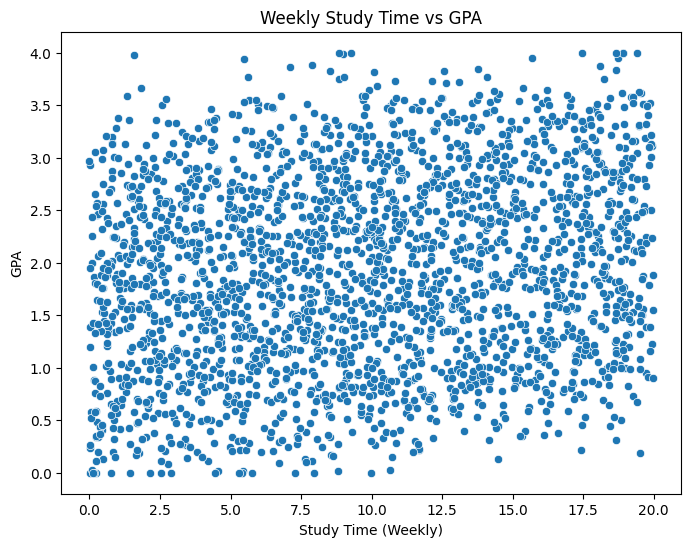

In [ ]:
 # Scatter Plot: StudyTimeWeekly vs GPA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x="StudyTimeWeekly", y="GPA", data=df)
plt.title("Weekly Study Time vs GPA")
plt.xlabel("Study Time (Weekly)")
plt.ylabel("GPA")
plt.show()


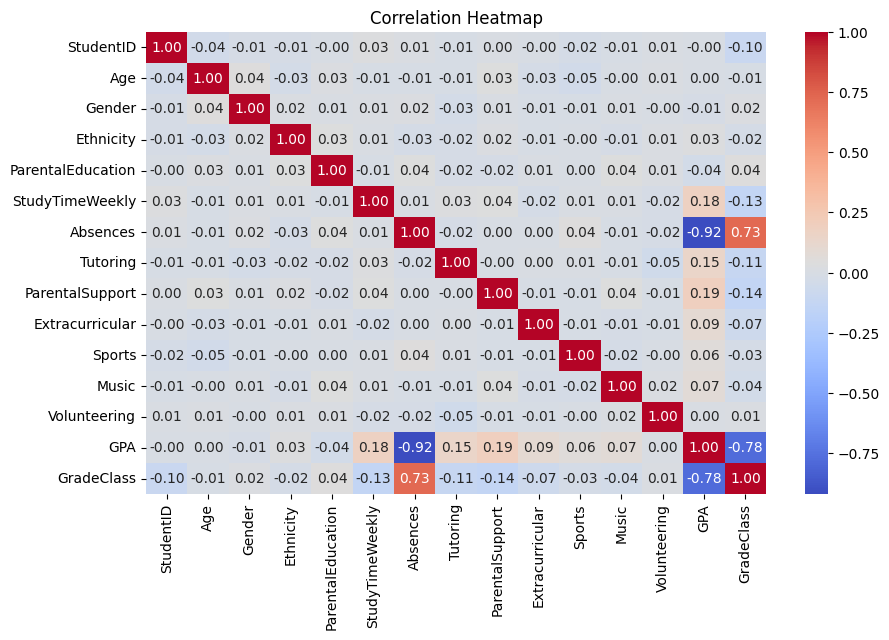

In [ ]:
 # Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **5. Data Splitting**

In [ ]:
 # Train-Test Split

# Features and target
X = df[['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport']]
y = df['GPA']

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((1913, 4), (479, 4))

# **6. Model Training**

In [ ]:
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 2.6734186191778715
Coefficients: [ 0.02913589 -0.09933024  0.26192384  0.147892  ]


# **7. Model Evaluation**

In [ ]:
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# R-squared
r2 = r2_score(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.9283499603686272
RMSE: 0.24341272474508394


# **7. Visualization of Predictions**

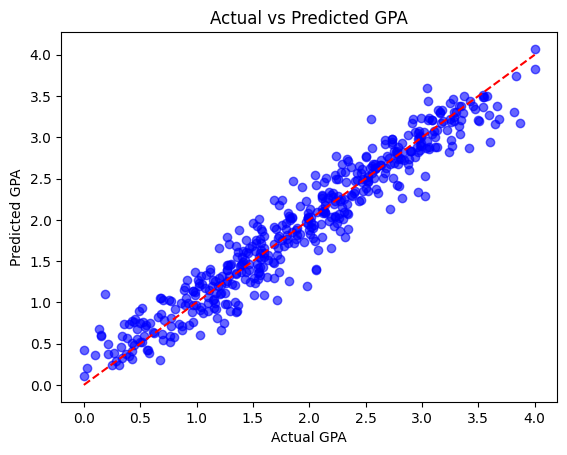

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 4], [0, 4], color='red', linestyle='--')  # perfect prediction line
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA")
plt.show()


# **8. Polynomial Regression**

In [ ]:
# Create Polynomial Regression model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Predictions
y_poly_pred = poly_model.predict(X_test)

# Evaluation metrics
r2_poly = r2_score(y_test, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_poly_pred))

print("Polynomial Regression (degree=2) R²:", r2_poly)
print("Polynomial Regression (degree=2) RMSE:", rmse_poly)


Polynomial Regression (degree=2) R²: 0.9277822337116801
Polynomial Regression (degree=2) RMSE: 0.24437517520466476


In [ ]:
 # Feature Engineering Experiments

# Use all features except StudentID, GPA, and GradeClass
X_full = df.drop(columns=['StudentID', 'GPA', 'GradeClass'])
y_full = df['GPA']

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

# Train linear regression on full features
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

# Predictions
y_full_pred = model_full.predict(X_test_full)

# Evaluation
r2_full = r2_score(y_test_full, y_full_pred)
rmse_full = np.sqrt(mean_squared_error(y_test_full, y_full_pred))

print("Full Feature Model R²:", r2_full)
print("Full Feature Model RMSE:", rmse_full)


Full Feature Model R²: 0.9532471681022928
Full Feature Model RMSE: 0.196625129356709


## **9. Comparison and Conclusion**

### **Model Performance Summary**

| **Model**                           | **Features Used**                          | **R² Score** | **RMSE** |
|-------------------------------------|--------------------------------------------|--------------|----------|
| **Base Linear Regression**          | `StudyTimeWeekly, Absences, ParentalSupport, Tutoring` | 0.9283       | 0.2434   |
| **Polynomial Regression (Degree=2)**| Same 4 features                            | 0.9278       | 0.2444   |
| **Full Feature Model**              | All features except *StudentID* & target   | **0.9532**   | **0.1966** |

---

### **Key Insights**
1. **Linear Regression (base model)** already performed very well, explaining about *93% of the variance* in GPA.  
2. **Polynomial Regression** did **not** improve performance, meaning the relationship between GPA and features is mostly linear.  
3. The **Full Feature Model** performed the best, explaining *95.3% of the variance* with a lower RMSE of *0.19*.  
4. This shows GPA is not only influenced by study time and absences, but also by **extracurricular activities, parental education, and other lifestyle factors**.

---

### **Conclusion**
- A **simple linear regression** with a few features provides good accuracy, but it misses important context.  
- **Polynomial regression added complexity without benefit**, confirming that GPA relationships are largely linear.  
- The **full feature linear regression model** is the most effective, achieving **R² ≈ 0.95** and **RMSE ≈ 0.19**.  
- For future improvement, one could experiment with **advanced models** such as *Random Forest, Gradient Boosting, or Neural Networks* to see if they can capture more complex relationships.  

✅ **Final Takeaway:** GPA is best predicted when combining academic effort (*study time, absences*) with *family, extracurricular, and lifestyle factors*.  



In [ ]:
###